# Code Challenge

1) Write a python function (def) that builds and trains the model, and outputs the final predictions an losses.

2) Write a function that creates the data and outputs x, y. x is the same as in the previous video. y = m*x+randn/2. n=50

3) In a parametric experiment, vary the slope from -2 to +2 in 21 steps. Repeat the entire experiment 50 times.

4) Plot the loss and accuracy (correlation of y^ (hat), y) as a function of the slope.

In [24]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [46]:
# Data creation function
def dataCreation(m, n = 50):
  data = []

  x = torch.randn(n, 1)
  y = m*x + torch.randn(n,1)/2

  data.append(x)
  data.append(y)
  return data

# Function that trains the model and outputs prediction
def ANN(data):
    x, y = data

    # ANN Architecture
    ANNreg = nn.Sequential(
        nn.Linear(1, 1), # input
        nn.ReLU(), # activation
        nn.Linear(1, 1) # output
    )
    # Learning rate
    learningRate = 0.05

    # Loss Function
    lossFunction = nn.MSELoss()

    # Optimizer (Type of Gradient Descent)
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate) #Stochastic GD

    # Number of epochs
    numEpochs = 500

    # creates a 1D tensor filled with zeros that will be used to store the loss value at each training epoch.
    losses = torch.zeros(numEpochs)

    # Training loop
    for epoch in range(numEpochs):

      # forward pass
      yHat = ANNreg(x)

      # compute loss
      loss = lossFunction(yHat, y)
      losses[epoch] = loss

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # show te losses

    # manually compute losses
    # final forward pass
    predictions = ANNreg(x)

    # final loss (MSE)
    testloss = (predictions-y).pow(2).mean()

    #plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
    #plt.xlabel('Epoch')
    #plt.ylabel('Loss')
    #plt.show()
    return predictions, losses


# One test


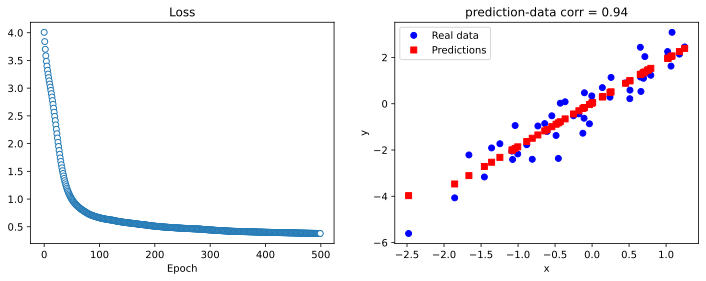

In [47]:
# create a dataset
dataTest = dataCreation(2)
x, y = dataTest

# run the model
yHat,losses = ANN(dataTest)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()

# Experiment


In [48]:
# (takes 3 mins with 21 slopes and 50 exps)

# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):

    # create a dataset and run the model
    data = dataCreation(slopes[slopei])
    yHat,losses = ANN(data)
    yHat = yHat.detach()

    # store the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,yHat.T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


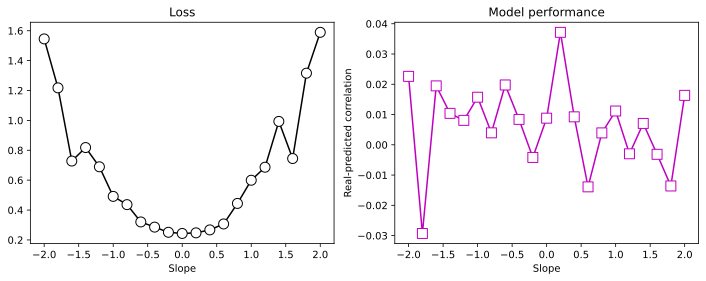

In [49]:
# plot of the results

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

**Why were the losses larger with larger slopes, even though the fit to the data was better?**

Losses are not normalized; they are in the scale of the data. Larger slopes led to more variance in y.

Take-home: Losses can only be compared on the same data, or on different datasets that are normalized to the same numeric range.

**Why did the model accuracy drop when the slopes were close to zero?**

x is less informative about y when the slope decreases. The model had less useful information about y.

Take-home: ANNs (and DL in general) don't predict data values; they learn relationship across variables (wich might be too complex for humans).